**Aim :- To implement Multiple Linear Regression in Python and R**

Theory :- 1) Why Do we need to study MLR
Here are some reasons-
Real-world Complexity:
Many real-world phenomena are influenced by multiple factors. MLR allows us to model and analyze these complex relationships by considering the impact of multiple variables simultaneously.

Improved Predictions:
By including multiple variables, MLR can often provide more accurate predictions compared to simple linear regression, especially when the outcome is influenced by a combination of factors.

Variable Selection:
MLR helps in identifying the most important variables that have a significant impact on the dependent variable. This can guide decision-making and resource allocation.

Understanding Relationships:
MLR provides insights into the strength and direction of relationships between the dependent and independent variables, helping researchers and analysts understand how different factors contribute to the overall outcome.

2) Equation of MLR
y = b0 + b1X1 + b2X2 + ... + bnXn

### **Implementation**

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Import Dataset

In [3]:
dataset = pd.read_csv('50_Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


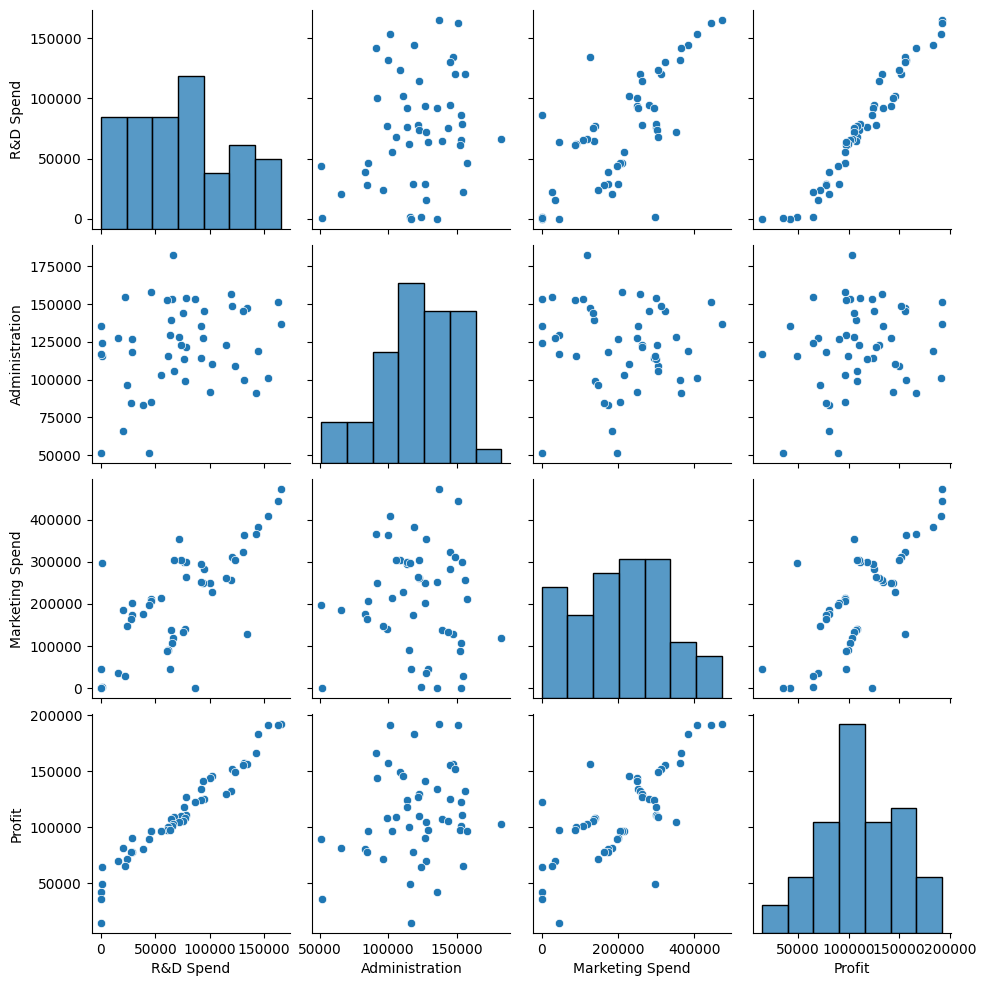

In [8]:
import seaborn as sns
sns.pairplot(dataset)
plt.show()

<ipython-input-9-433228cbac21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


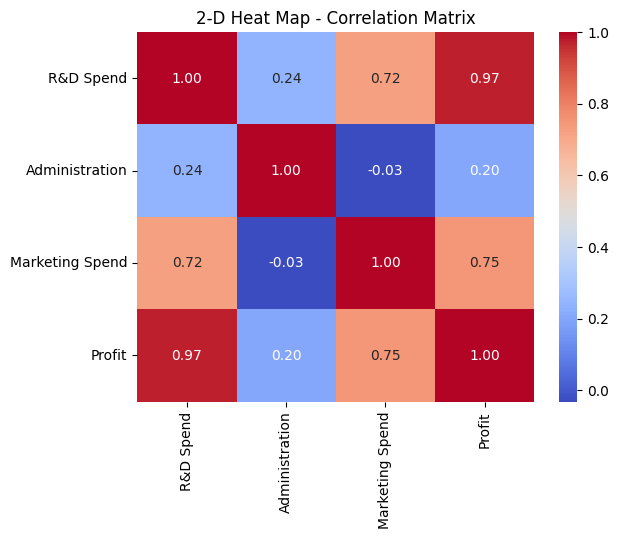

In [9]:
correlation_matrix = dataset.corr()

# Plot the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.title("2-D Heat Map - Correlation Matrix")
plt.show()

In [10]:
X = dataset.iloc[:, :-1].values  #All columns except last column(Profit)
y = dataset.iloc[:, -1].values   #last column (Profit)

In [11]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [12]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


Encoding Categorical Variables

In [13]:
#Encoding Categorical Variables city
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Splitting into training and test sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Training the model on training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting Test Set Results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


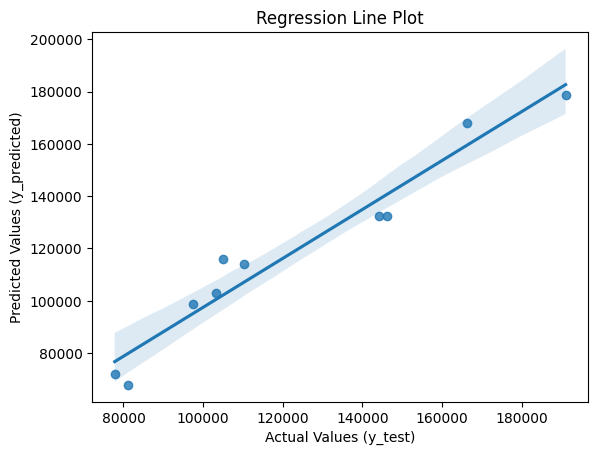

In [18]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_predicted)")
plt.title("Regression Line Plot")
plt.show()


In [19]:
pip install statsmodels


In [20]:
import statsmodels.api as sm
X = sm.add_constant(dataset[['R&D Spend', 'Administration', 'Marketing Spend']])

# Dependent variable
y = dataset['Profit']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract specific values
r_squared = model.rsquared
intercept = model.params['const']
coefficients = model.params.drop('const')

print(f'R-squared: {r_squared}')
print(f'Intercept (beta_0): {intercept}')
print('Coefficients:')
print(coefficients)

R-squared: 0.9507459940683246
Intercept (beta_0): 50122.19298986527
Coefficients:
R&D Spend          0.805715
Administration    -0.026816
Marketing Spend    0.027228
dtype: float64


# **Implementation in R**

In [1]:

install.packages("tidyverse")
library(tidyverse)

install.packages("lmtest")
library(lmtest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
dataset <- read.csv('50_Startups.csv')

head(dataset)

,R.D.Spend,Administration,Marketing.Spend,State,Profit
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,165349.2,136897.80,471784.1,New York,192261.8
2,162597.7,151377.59,443898.5,California,191792.1
3,153441.5,101145.55,407934.5,Florida,191050.4
4,144372.4,118671.85,383199.6,New York,182902.0
5,142107.3,91391.77,366168.4,Florida,166187.9
6,131876.9,99814.71,362861.4,New York,156991.1


In [3]:
# Display information about the dataset
str(dataset)


'data.frame':	50 obs. of  5 variables:
 $ R.D.Spend      : num  165349 162598 153442 144372 142107 ...
 $ Administration : num  136898 151378 101146 118672 91392 ...
 $ Marketing.Spend: num  471784 443899 407935 383200 366168 ...
 $ State          : chr  "New York" "California" "Florida" "New York" ...
 $ Profit         : num  192262 191792 191050 182902 166188 ...


In [4]:
# Check for missing values
sum(is.na(dataset))

[1] 0

In [5]:

# Descriptive statistics
summary(dataset)

   R.D.Spend      Administration   Marketing.Spend     State          
 Min.   :     0   Min.   : 51283   Min.   :     0   Length:50         
 1st Qu.: 39936   1st Qu.:103731   1st Qu.:129300   Class :character  
 Median : 73051   Median :122700   Median :212716   Mode  :character  
 Mean   : 73722   Mean   :121345   Mean   :211025                     
 3rd Qu.:101603   3rd Qu.:144842   3rd Qu.:299469                     
 Max.   :165349   Max.   :182646   Max.   :471784                     
     Profit      
 Min.   : 14681  
 1st Qu.: 90139  
 Median :107978  
 Mean   :112013  
 3rd Qu.:139766  
 Max.   :192262  

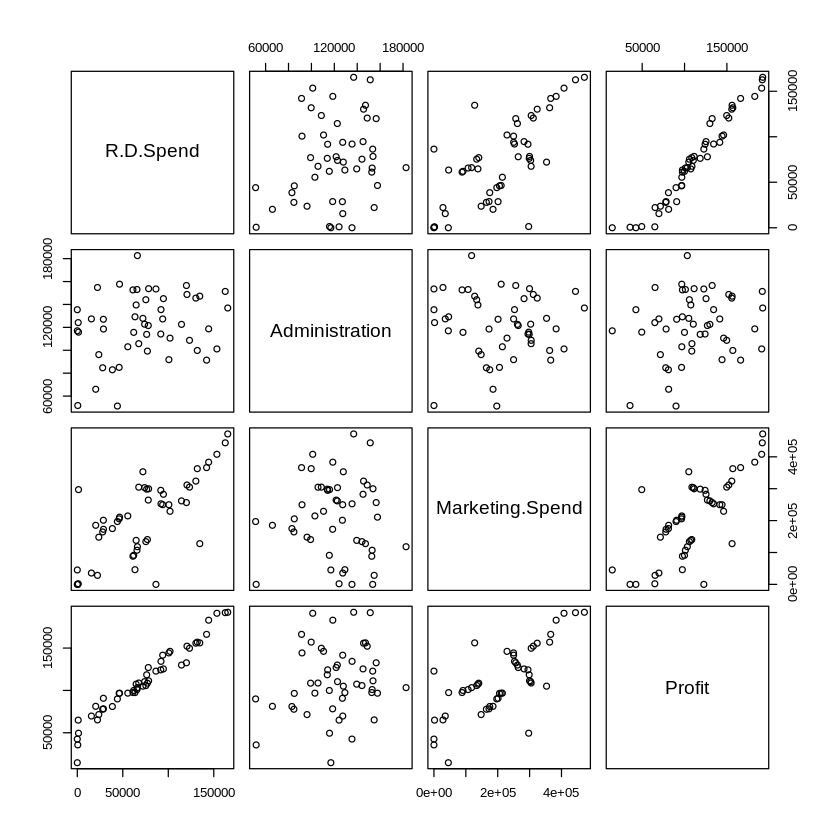

In [6]:
# Extract numeric columns
numeric_cols <- sapply(dataset, is.numeric)
numeric_data <- dataset[, numeric_cols]

# Plot pairs for numeric data
pairs(numeric_data)


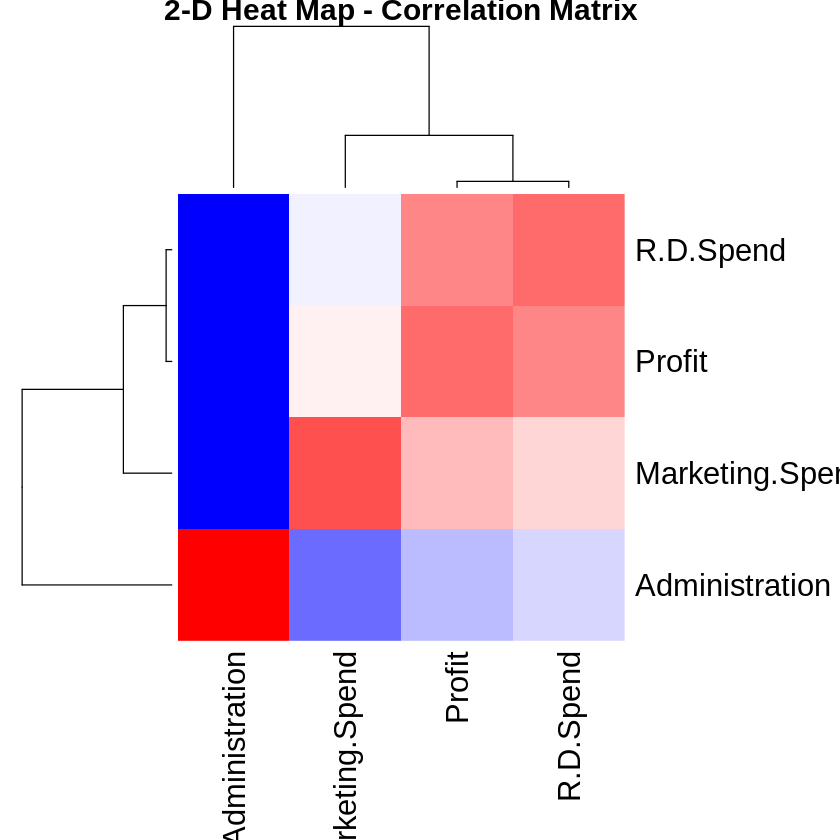

In [11]:
# Exclude non-numeric columns
numeric_data <- dataset[, sapply(dataset, is.numeric)]

# Calculate the correlation matrix
correlation_matrix <- cor(numeric_data)

# Plot the heatmap
heatmap(correlation_matrix,
        col = colorRampPalette(c("blue", "white", "red"))(20),
        main = "2-D Heat Map - Correlation Matrix",
        margins = c(10, 10),
        labRow = rownames(correlation_matrix),
        labCol = colnames(correlation_matrix))


In [12]:
X <- dataset[, c("R.D.Spend", "Administration", "Marketing.Spend")]
y <- dataset$Profit

In [13]:
set.seed(0)  # Set random seed for reproducibility
train_indices <- sample(1:nrow(dataset), 0.8 * nrow(dataset))
train_data <- dataset[train_indices, ]
test_data <- dataset[-train_indices, ]

In [14]:
# Fit the linear regression model
lm_model <- lm(Profit ~ ., data = train_data)

In [15]:
# Make predictions on the test set
predictions <- predict(lm_model, newdata = test_data)

In [16]:
# Print the actual and predicted values side by side
print(cbind(predictions, test_data$Profit))

   predictions          
8    156586.98 155752.60
11   131515.34 146121.95
13   125251.57 141585.52
22   118150.61 111313.02
24   106066.18 108733.99
29    97528.96 103282.38
30   101998.97 101004.64
32    97816.07  97483.56
37    70990.72  90708.19
42    70197.01  77798.83


In [17]:
install.packages("lmtest")
library(lmtest)

# Fit the model using lmtest
model <- lm(Profit ~ R.D.Spend + Administration + Marketing.Spend, data = dataset)

r_squared <- summary(model)$r.squared
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]

cat("R-squared:", r_squared, "\n")
cat("Intercept (beta_0):", intercept, "\n")
cat("Coefficients:", coefficients, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



R-squared: 0.950746 
Intercept (beta_0): 50122.19 
Coefficients: 0.805715 -0.02681597 0.02722806 


### Conclusion:- Thus, we have successfully implemented Multiple Linear Regression in Python and R.